In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

uploaded = files.upload()
df = pd.read_csv("Mall_Customers.csv")


Saving Mall_Customers.csv to Mall_Customers (4).csv


In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
print("\nDataset Statistics:")
print(df.describe())


Dataset Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


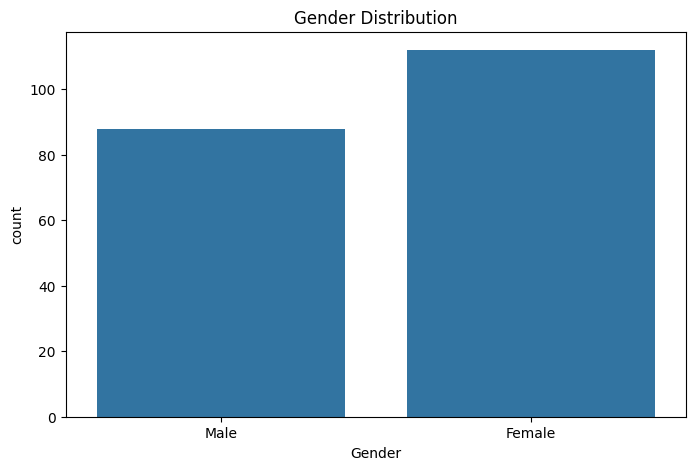

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

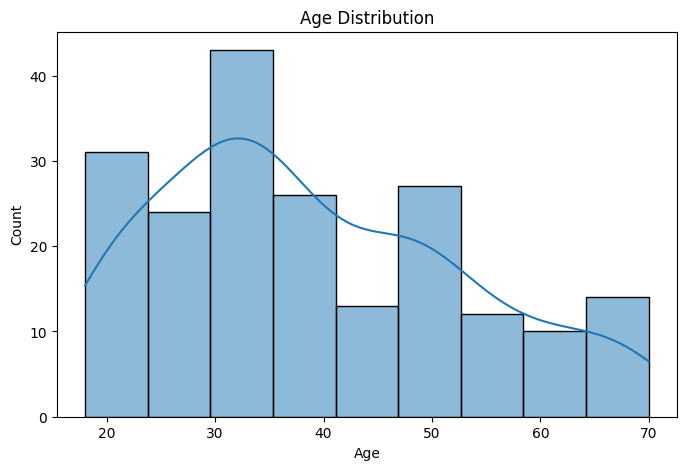

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

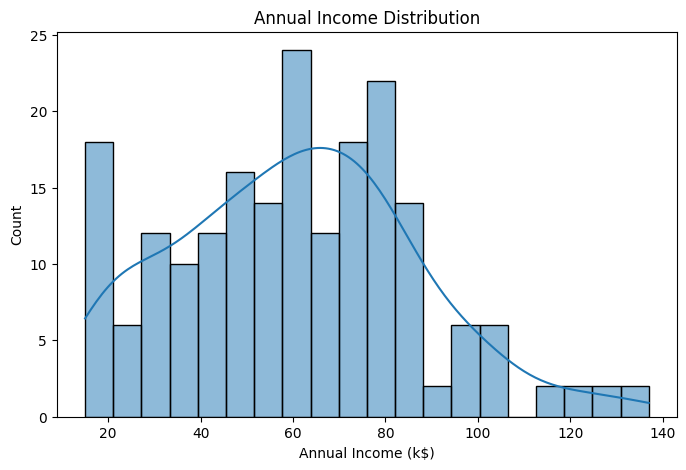

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Annual Income Distribution')
plt.show()

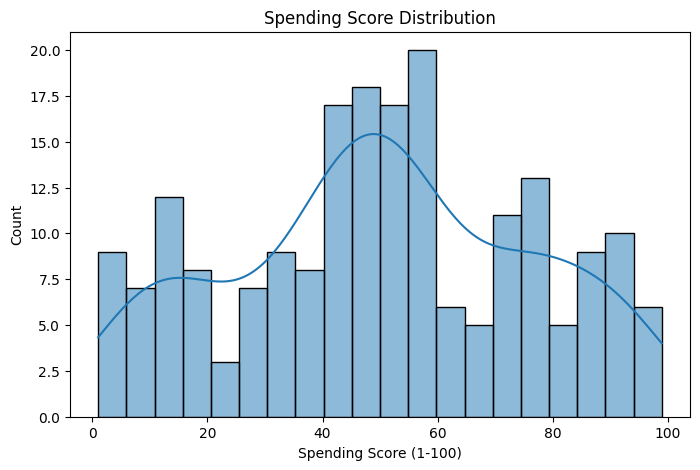

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Spending Score Distribution')
plt.show()

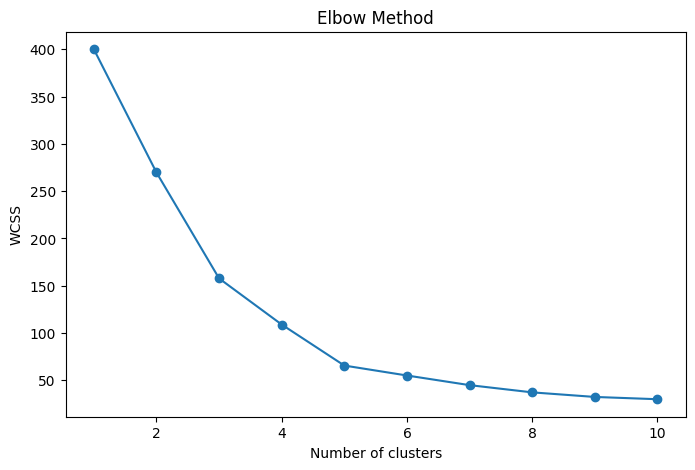

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

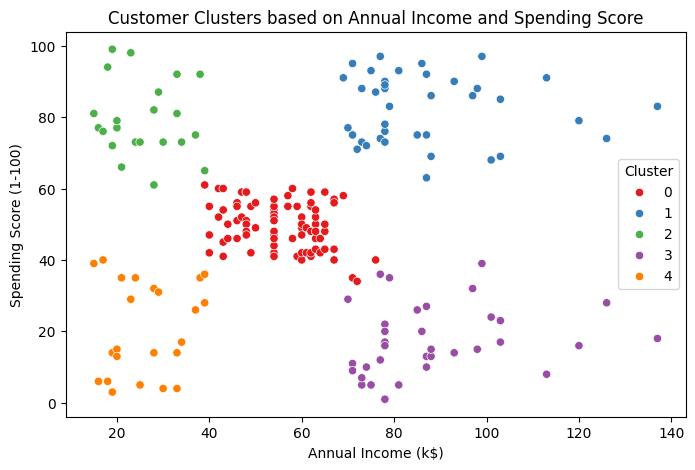

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans

plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.show()